This page demonstrate how to perform a basic spectral fitting operation using JAXspec. 

In [1]:
%matplotlib inline
import numpyro
from jax.config import config
import arviz as az

config.update("jax_enable_x64", True)
numpyro.set_platform("cpu")
numpyro.set_host_device_count(4)

## Model building 

The first step consists in building your model using the various components available in JAXspec. Using the 

In [2]:
from jaxspec.model.additive import Powerlaw
from jaxspec.model.multiplicative import Tbabs

model = Tbabs()*Powerlaw()
#model.plot()

## Loading the observations

In [3]:
from jaxspec.data.util import example_observations as obs_list
from jaxspec.fit import BayesianModel

forward = BayesianModel(model, list(obs_list.values()))

## Build a prior distribution for the model

In [4]:
import numpyro.distributions as dist

def prior():

    pars_inference = {'powerlaw_1':
                          {'alpha': dist.Uniform(0, 10),
                           'norm': dist.Exponential(1e4)},
                        'tbabs_1':
                            {'N_H': dist.Uniform(0, 1)}}

    return pars_inference

## Launch MCMC and gather results

In [5]:
result = forward.fit(prior())

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

## Posterior checks

Here is the trace plot

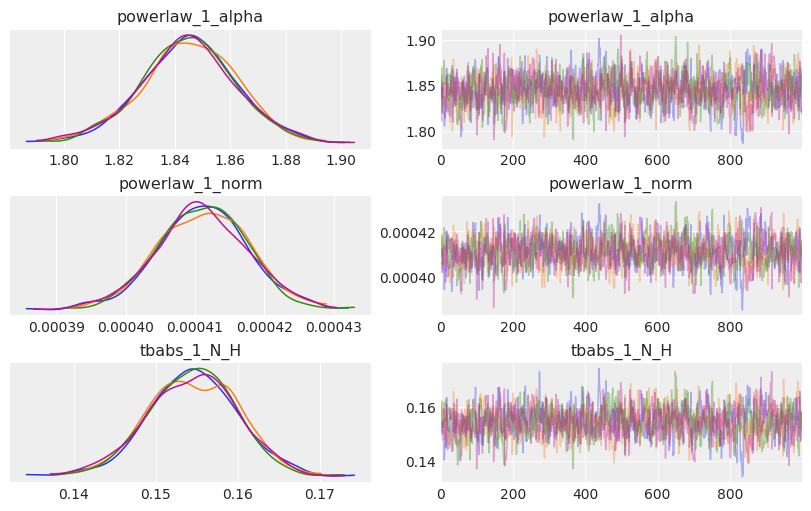

In [6]:
import arviz as az 
az.style.use("arviz-darkgrid")
az.plot_trace(result.inference_data,  figsize=(8,5), compact=False);

Here is the corner plot

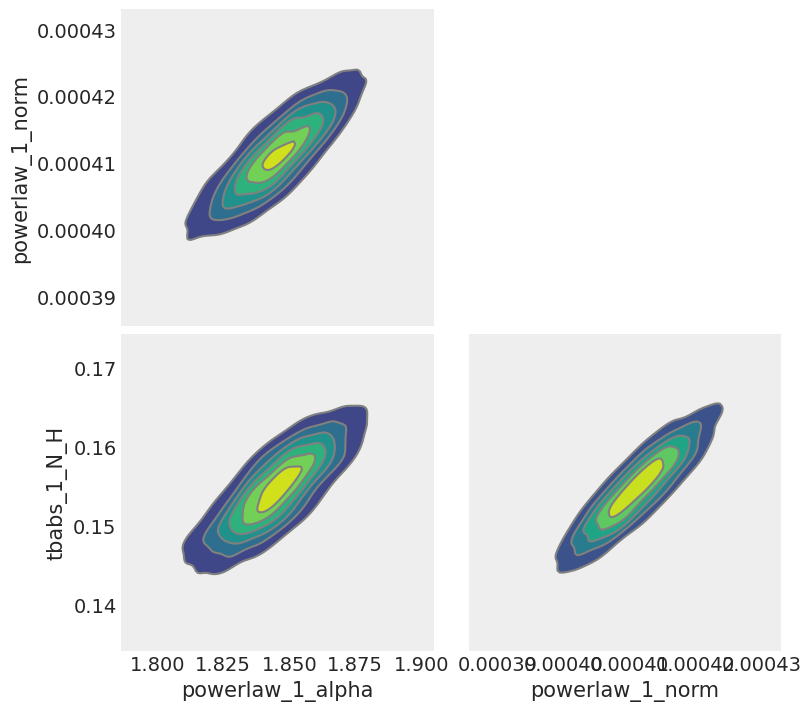

In [7]:
az.plot_pair(result.inference_data, kind="kde", figsize=(8,7));

In [9]:
#from jaxspec.data.util import fakeit, fakeits
#from jax.tree_util import tree_map

#mock_obs = fakeit(list(obs_list.values()), model, tree_map(lambda x: x[0], result.params))

# Posterior predictive checks

In [ ]:
"""
import matplotlib.pyplot as plt 
import numpy as np 

plt.figure(figsize=(15,5))

res = fakeits(fakeits, model, result.params)

for i, obs in zip(range(3), list(obs_list.values())):
    plt.subplot(131+i)
    plt.fill_between(np.mean(obs.out_energies, axis=0), *np.percentile(res[i], (14, 86), axis=0), alpha=0.3)
    plt.plot(np.mean(obs.out_energies, axis=0), obs.observed_counts, label="data")
    plt.loglog()
"""